In [4]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
from tqdm import tqdm
import torch.nn as nn
import torch.functional as F

In [2]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)

import torch
import torch.nn as nn
xs = [0 for i in range(hex.SIZE)]
ys = [0 for i in range(hex.SIZE)]

for _ in range(500):
    game = hex.HexGame()
            
    model = random_model.RandModel()
    tree = mcts.MCTS(game, model)
    (x, y) = tree.run(10)
    xs[x] += 1
    ys[y] += 1
print(xs)
print(ys)

[125, 133, 127, 115]
[134, 100, 148, 118]


In [7]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import torch
import torch.nn as nn

game = hex.HexGame()

for i in range(0, hex.SIZE-1):
    for j in range(1, 3):
        game.place_piece(i, j)   
        game.take_turn()    

print(game) 
model = random_model.RandModel()
tree = mcts.MCTS(game, model)

(x, y) = tree.run(100)
print(x, y)
game.place_piece(x, y)
print(game)
print(game.check_winner())
game.take_turn()

. x o . 
 . x o . 
  . x o . 
   . . . . 

3 1
. x o . 
 . x o . 
  . x o . 
   . x . . 

(0, [(0, 1), (1, 1), (2, 1), (3, 1)])


In [80]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import torch
import torch.nn as nn

game = hex.HexGame()

for i in range(0, hex.SIZE-1):
    for j in range(1, 3):
        game.place_piece(j, i+j%2)   
        game.take_turn()    

print(game) 
model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
tree = mcts.MCTS(game, model)
(x, y) = tree.run(100)
tree.visualize()
print(x, y)
game.place_piece(x, y)
print(game)
print(game.check_winner())
game.take_turn()

. . . . 
 . x x x 
  o o o . 
   . . . . 

2 3
. . . . 
 . x x x 
  o o o x 
   . . . . 

(None, [])


In [85]:
import random
import importlib
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)

SelfGame = self_play.SelfPlay(agent_)
data = SelfGame.generate_data(5, 1, shuffle=True)
print(f"len(data): {len(data)}")

Games of Self Play:   0%|          | 0/5 [00:00<?, ?it/s]

Games of Self Play: 100%|██████████| 5/5 [00:12<00:00,  2.47s/it]

Player 0 wins: 3, Player 1 wins: 2, Draws: 0
len(data): 53


[1]/[50]: Training Loss: 3.8708253557031806 - MSE Loss: 1.1037434989755803 - CE Loss: 2.767081867564808
[1]/[50]: Validation Loss: 3.643772840499878 - Val MSE Loss: 0.8739607334136963 - Val CE Loss: 2.7698121070861816
[2]/[50]: Training Loss: 2.627165588465604 - MSE Loss: 0.19109379296953027 - CE Loss: 2.4360718076879326
[2]/[50]: Validation Loss: 3.4256807963053384 - Val MSE Loss: 0.6631831924120585 - Val CE Loss: 2.762497584025065
[3]/[50]: Training Loss: 2.4013152555985884 - MSE Loss: 0.1545683956620368 - CE Loss: 2.246746843511408
[3]/[50]: Validation Loss: 3.1778016090393066 - Val MSE Loss: 0.4648533761501312 - Val CE Loss: 2.7129482428232827
[4]/[50]: Training Loss: 2.343383453109048 - MSE Loss: 0.16836349869316275 - CE Loss: 2.175020001151345
[4]/[50]: Validation Loss: 2.8923404216766357 - Val MSE Loss: 0.20986407001813254 - Val CE Loss: 2.682476361592611
[5]/[50]: Training Loss: 2.2122280380942603 - MSE Loss: 0.10618396808223968 - CE Loss: 2.106044119054621
[5]/[50]: Validation

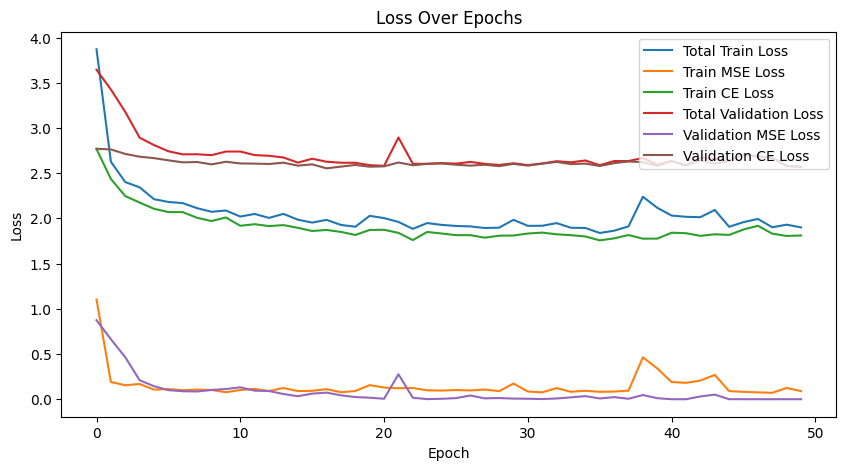

In [90]:
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)
agent_.train(data, epochs=50, lr=0.0001, batch_size=4, l2=1)

In [166]:
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)
import Training.Match as match
importlib.reload(match)
model0 = random_model.RandModel()
agent0 = agent.Agent(model0)
wins = [0,0]
for _ in tqdm(range(50)):
    winner = match.match(agent_, agent0, False)
    wins[winner] += 1
print(wins)


100%|██████████| 50/50 [02:18<00:00,  2.77s/it]

[25, 25]


Games of Self Play: 100%|██████████| 10/10 [00:28<00:00,  2.81s/it]


Player 0 wins: 2, Player 1 wins: 8, Draws: 0
len(data): 104
[1]/[5]: Training Loss: 2.9380568209148588 - MSE Loss: 0.30577225630570737 - CE Loss: 2.632284573146275
[1]/[5]: Validation Loss: 4.3385023673375445 - Val MSE Loss: 1.6589463031850755 - Val CE Loss: 2.6795560121536255
[2]/[5]: Training Loss: 2.364134493328276 - MSE Loss: 0.06494924421921107 - CE Loss: 2.299185241971697
[2]/[5]: Validation Loss: 4.283191919326782 - Val MSE Loss: 1.7032915311865509 - Val CE Loss: 2.57990034421285
[3]/[5]: Training Loss: 2.187649340856643 - MSE Loss: 0.03784774704780873 - CE Loss: 2.1498015835171653
[3]/[5]: Validation Loss: 4.1572175820668535 - Val MSE Loss: 1.646707355355223 - Val CE Loss: 2.510510206222534
[4]/[5]: Training Loss: 2.112596869468689 - MSE Loss: 0.022970604710280895 - CE Loss: 2.0896262668427967
[4]/[5]: Validation Loss: 4.013437787691752 - Val MSE Loss: 1.5535608798575897 - Val CE Loss: 2.459876775741577
[5]/[5]: Training Loss: 2.0472476482391357 - MSE Loss: 0.013484183915092476

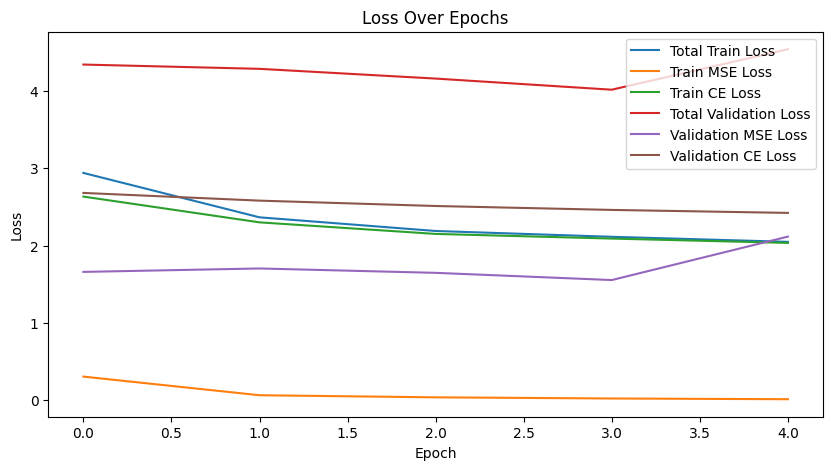

Games of Self Play:  80%|████████  | 8/10 [00:25<00:06,  3.23s/it]


KeyboardInterrupt: 

In [168]:
import random
import Game.Hex as hex
importlib.reload(hex)

import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)

for _ in range(2):
    SelfGame = self_play.SelfPlay(agent_)
    data = SelfGame.generate_data(10, 0.9, shuffle=True)
    print(f"len(data): {len(data)}")
    agent_.train(data, epochs=5, lr=0.0001, batch_size=4, l2=0.5)

In [136]:
eval_data = random.choices(data, k=10)
model.eval()
for d in eval_data:
    print("label: ")
    print(d[-2])
    print("pred: ")
    print(model(d[0].unsqueeze(dim=0), d[1].unsqueeze(dim=0))[1])
    print("---")
model.train();

label: 
tensor([[0.0404, 0.0808, 0.0707, 0.0707],
        [0.0808, 0.0808, 0.1010, 0.0707],
        [0.0606, 0.0000, 0.0303, 0.0707],
        [0.0404, 0.0707, 0.0909, 0.0404]])
pred: 
tensor([[[0.0471, 0.0927, 0.0654, 0.0467],
         [0.0964, 0.0405, 0.0615, 0.0729],
         [0.0749, 0.0000, 0.0439, 0.0733],
         [0.0704, 0.0624, 0.0957, 0.0561]]], grad_fn=<ViewBackward0>)
---
label: 
tensor([[0.0505, 0.0808, 0.0000, 0.0000],
        [0.0808, 0.1111, 0.0000, 0.0404],
        [0.0404, 0.1111, 0.0505, 0.0808],
        [0.0606, 0.0909, 0.1616, 0.0404]])
pred: 
tensor([[[0.0357, 0.0750, 0.0000, 0.0000],
         [0.1222, 0.0442, 0.0000, 0.0969],
         [0.0799, 0.0688, 0.0622, 0.0917],
         [0.0714, 0.0780, 0.1133, 0.0607]]], grad_fn=<ViewBackward0>)
---
label: 
tensor([[0.0404, 0.0808, 0.0707, 0.0707],
        [0.0808, 0.0808, 0.1010, 0.0707],
        [0.0606, 0.0000, 0.0303, 0.0707],
        [0.0404, 0.0707, 0.0909, 0.0404]])
pred: 
tensor([[[0.0473, 0.0793, 0.0656, 0.0469],